<a href="https://colab.research.google.com/github/Angana1/Stock-Price-Prediction-London-Metal-Exchange-/blob/main/ARIMA_Model_Lead_Monthly_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
import datetime

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


# Getting Data

In [ ]:
#importing Monthly Weighted Average Lead Price csv dataset
sales = pd.read_csv('/content/Monthly Weighted Avg Lead Price.csv')

In [ ]:
sales['Date']=pd.to_datetime(sales['Date'],format="%b-%y")

In [ ]:
print(sales)
print("Datatype of column Date:",sales['Date'].dtype)

          Date  Weighted Average Price
0   2008-01-01             2601.678175
1   2008-02-01             2797.112343
2   2008-03-01             1802.000000
3   2008-04-01             1802.000000
4   2008-05-01             1802.000000
..         ...                     ...
156 2021-01-01             2012.419036
157 2021-02-01             2089.104842
158 2021-03-01             1954.569200
159 2021-04-01             1997.856000
160 2021-05-01             2188.551802

[161 rows x 2 columns]
Datatype of column Date: datetime64[ns]


In [ ]:
sales = sales.set_index(['Date'])
sales.head()

,Weighted Average Price
Date,
2008-01-01,2601.678175
2008-02-01,2797.112343
2008-03-01,1802.000000
2008-04-01,1802.000000
2008-05-01,1802.000000


In [ ]:
#sales.shape : (161,1)
print("Number of data points in timeseries: ", len(sales))

Number of data points in timeseries:  161


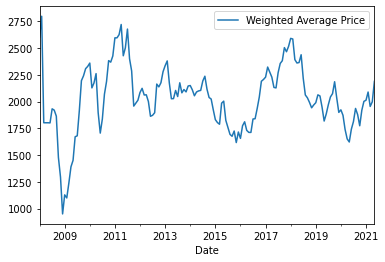

In [ ]:
sales.plot()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


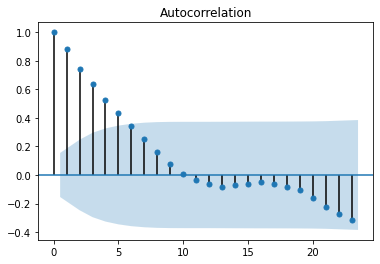

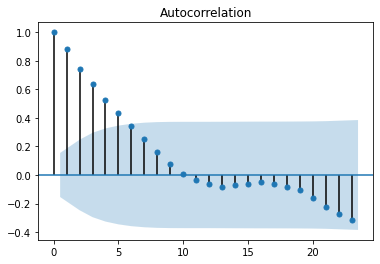

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales)

This shows that data is non-stationary. 

# Converting series to stationary

In [ ]:
sales_diff = sales.diff(periods=1)
# integrated of order 1, denoted by d (for diff), one of the parameter of ARIMA model


In [ ]:
sales_diff = sales_diff[1:]
sales_diff.head()

,Weighted Average Price
Date,
2008-02-01,195.434168
2008-03-01,-995.112343
2008-04-01,0.000000
2008-05-01,0.000000
2008-06-01,-1.199974


In [ ]:
print(sales_diff.shape)

(160, 1)


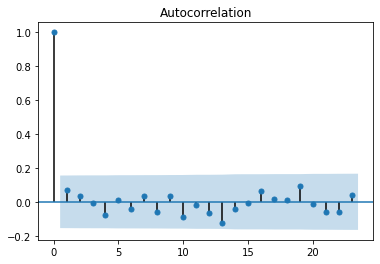

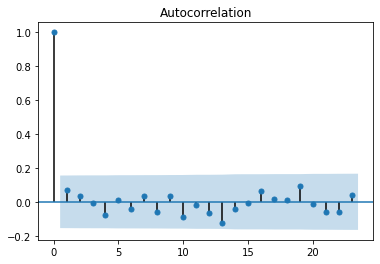

In [ ]:
plot_acf(sales_diff)

Data is now stationary, as can be seen from the autocorrelation plot.

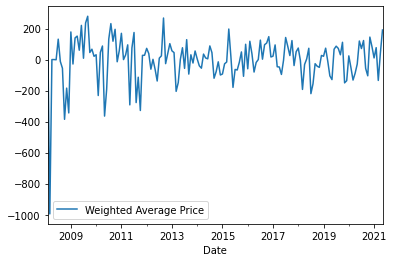

In [ ]:
sales_diff.plot()

# Creating dataset input for AR Model and ARIMA Model

In [ ]:
X = sales.values # 160 values
print(len(X))

161


In [ ]:
train = X[0:156] # 156 training
test = X[156:161]  # 5 tests. these will act as labels used to check how accurate our predictions are
predictions = []
print("Train size: ", train.size)
print("Test size: ", test.size)

Train size:  156
Test size:  5


# Autoreggresive AR Model

In [ ]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [ ]:
predictions = model_ar_fit.predict(start=156,end=160)

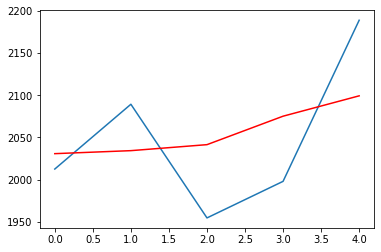

In [ ]:
plt.plot(test)
plt.plot(predictions,color='red')

The overall trend has been identified, however the peaks and lows are not being predicted.

In [ ]:
test #labels

array([[2012.419036],
       [2089.104842],
       [1954.5692  ],
       [1997.856   ],
       [2188.551802]])

In [ ]:
predictions #predictions

array([2030.63116804, 2034.19128813, 2041.28935493, 2074.97528296,
       2099.07521031])

# ARIMA Model

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
# figuring out a good combination of p,d,q

import itertools
p=d=q=range(0,9)
pdq = list(itertools.product(p,d,q))
maxi=10000
param_opt=(0,0,0)
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
        if(model_arima_fit.aic<maxi):
          maxi=model_arima_fit.aic
          param_opt=param
    except:
        continue
    

(0, 0, 0) 2239.8329842220332
(0, 0, 1) 2099.1347985134653
(0, 1, 0) 1984.5289831491714
(0, 1, 1) 1985.6981909093317
(0, 1, 2) 1987.3535054867898
(0, 1, 3) 1989.3369038236542
(0, 1, 4) 1989.7924405788997
(0, 1, 5) 1991.3485560786794
(0, 1, 6) 1991.2807788197306
(0, 1, 7) 1993.122317533296
(0, 1, 8) 1991.5696430451458
(0, 2, 0) 2066.238915382858
(0, 2, 1) 1979.52172186048
(0, 2, 2) 1980.6030333137448
(1, 0, 0) 1993.0907573135341
(1, 0, 1) 1992.4505413362335
(1, 0, 2) 1992.8525860538311
(1, 0, 3) 1994.2052500049795
(1, 0, 4) 1995.9331111918145
(1, 0, 5) 1996.1817494939787
(1, 0, 6) 1997.5914817683238
(1, 0, 7) 1997.9207915269553
(1, 0, 8) 1999.8235820859563
(1, 1, 0) 1985.6448522236346
(1, 1, 1) 1985.519446863245
(1, 2, 0) 2022.03581697895
(1, 2, 1) 1980.5296296813285
(1, 2, 2) 1980.4870777226972
(1, 2, 4) 1982.7659429725686
(1, 2, 5) 1983.9479127355694
(2, 0, 0) 1991.9541250086281
(2, 0, 1) 1993.1987217340893
(2, 1, 0) 1987.450256434797
(2, 1, 1) 1989.4353170520344
(2, 1, 2) 1988.3169066

In [ ]:
print(param_opt)

(0, 2, 1)


In [ ]:
#p,d,q  p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average model
model_arima = ARIMA(train,order=(1,2,1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

1980.5296296813285


In [ ]:
predictions= model_arima_fit.forecast(steps=5)[0]
predictions 

array([2014.20185425, 2020.8913465 , 2027.24745306, 2033.69698065,
       2040.27448296])

In [ ]:
test #labels

array([[2012.419036],
       [2089.104842],
       [1954.5692  ],
       [1997.856   ],
       [2188.551802]])

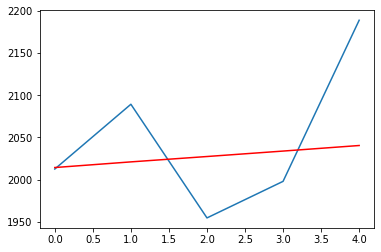

In [ ]:
plt.plot(test)
plt.plot(predictions,color='red')

Close Regression line. But cannot capture nuances.


In [ ]:
mean_squared_error(test,predictions)

6641.825422171778